In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time



In [2]:

cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(',\n'):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
print(len(columns))


42


In [3]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [4]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns)
  
# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])


print(df.shape)
print(df.head())

(494021, 43)
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2            

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols



['flag', 'protocol_type', 'service']

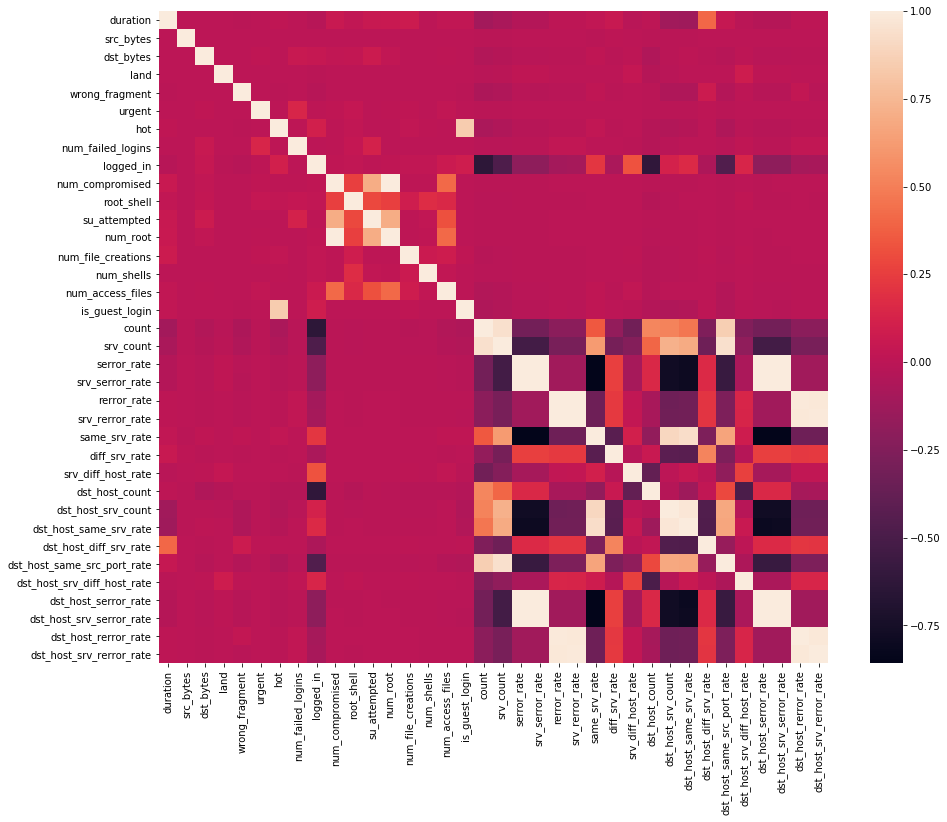

In [7]:

df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()



In [8]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [9]:

# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)



In [10]:

df.drop('service', axis = 1, inplace = True)


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Splitting the dataset
df = df.drop(['target', ], axis = 1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train)



(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)
       Attack Type
482186      normal
302290         dos
9330           dos
91417       normal
293169         dos
...            ...
259178         dos
365838         dos
131932         dos
146867      normal
121958         dos

[330994 rows x 1 columns]


In [16]:

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
y_train=np.nan_to_num(y_train)

clfg.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)





start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

y_test=np.nan_to_num(y_test)
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))



C:\Users\welcome\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time:  0.8840346336364746
Testing time:  0.9090063571929932
Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [19]:

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))




Training time:  1.6699306964874268
Testing time:  0.18756961822509766
Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [21]:

from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))



C:\Users\welcome\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training time:  11.629983901977539
Testing time:  1.6459949016571045
Train score is: 0.9999697879719874
Test score is: 0.999662632570065


In [22]:

from sklearn.svm import SVC

clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)



print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))



C:\Users\welcome\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time:  186.58339428901672
Testing time:  98.49075651168823
Train score is: 0.9987552644458811
Test score is: 0.9987916112055059
